# Automobile Accident Predictor

To develop a model to determine the level of danger for a driver based on differnte parameters we will go through the following steps with UK's road accident dataset:
- Data Exploration and Analysis:
    - Exploration
    - Clean Data Intiallly
    - Numerical Data Analysis
    - Categorical Data Analysis
    - Clean Data After Analysis
    - Label Encoding

- Models:
    - Logistic Regression
    - Ridge Classifier 
    - Decision Tree
    - Random Forest
    - ANN

## Data Exploration and Anlalysis

In [6]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter('ignore')

#### Exploration

In [7]:
#Importing DataSet
dataset = pd.read_csv('UK_Accident.csv')

#Note Book Config
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
#Data Overview
dataset.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,Single carriageway,30,None,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,Dual carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [9]:
#Columns of Data Available
dataset.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [10]:
#Data we are working with 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [11]:
# Number of columns that are actual numbers and objects
numerical_data = dataset.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)


categorical_data = dataset.select_dtypes(include='object')
cat_cols = categorical_data.columns
len(cat_cols)

print(f'Number Columns: {len(num_cols)} Cetegorical Columns: {len(cat_cols)}')


Number Columns: 18 Cetegorical Columns: 15


#### Cleaning Data

In [12]:
'''
Dropping certain columns we won't be working with:
- 'Unnamed: 0' : unecessary index
- 'Location_Easting_OSGR': location method used in UK
- 'Location_Northing_OSGR': location method used un UK
- 'Local_Authority_(Highway)': 
- 'LSOA_of_Accident_Location': location method used un UK
'''
dataset.drop(columns=['Unnamed: 0', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Local_Authority_(Highway)', 'LSOA_of_Accident_Location'], inplace=True)

In [13]:
#Look at missing values in each column
dataset.isnull().sum()

Accident_Index                                   0
Longitude                                      101
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                           117
Local_Authority_(District)                       0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
Junction_Control                                 0
2nd_Road_Class                                   0
2nd_Road_Number                                  0
Pedestrian_Crossing-Human_Control               17
Pedestrian_Crossing-Physical_Fa

In [14]:
'''
An approach to fix this problem of missing data is to drop the rows with missing data. Since we have over 1504150 we have the ability to do this. '
Using averaegs or other strategies won't work for objects like time and be non indicative for other parameters
'''
dataset.dropna(subset=['Longitude', 'Time', 'Pedestrian_Crossing-Human_Control', 
                  'Pedestrian_Crossing-Physical_Facilities'], inplace=True)

In [15]:
# Urabn and Rural has three values instead of two so we are just cleaning this
dataset['Urban_or_Rural_Area'].replace(3, 1, inplace=True)

#### Numerical Data

array([[<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Police_Force'}>,
        <Axes: title={'center': 'Accident_Severity'}>],
       [<Axes: title={'center': 'Number_of_Vehicles'}>,
        <Axes: title={'center': 'Number_of_Casualties'}>,
        <Axes: title={'center': 'Day_of_Week'}>,
        <Axes: title={'center': 'Local_Authority_(District)'}>],
       [<Axes: title={'center': '1st_Road_Class'}>,
        <Axes: title={'center': '1st_Road_Number'}>,
        <Axes: title={'center': 'Speed_limit'}>,
        <Axes: title={'center': '2nd_Road_Class'}>],
       [<Axes: title={'center': '2nd_Road_Number'}>,
        <Axes: title={'center': 'Urban_or_Rural_Area'}>,
        <Axes: title={'center': 'Year'}>, <Axes: >]], dtype=object)

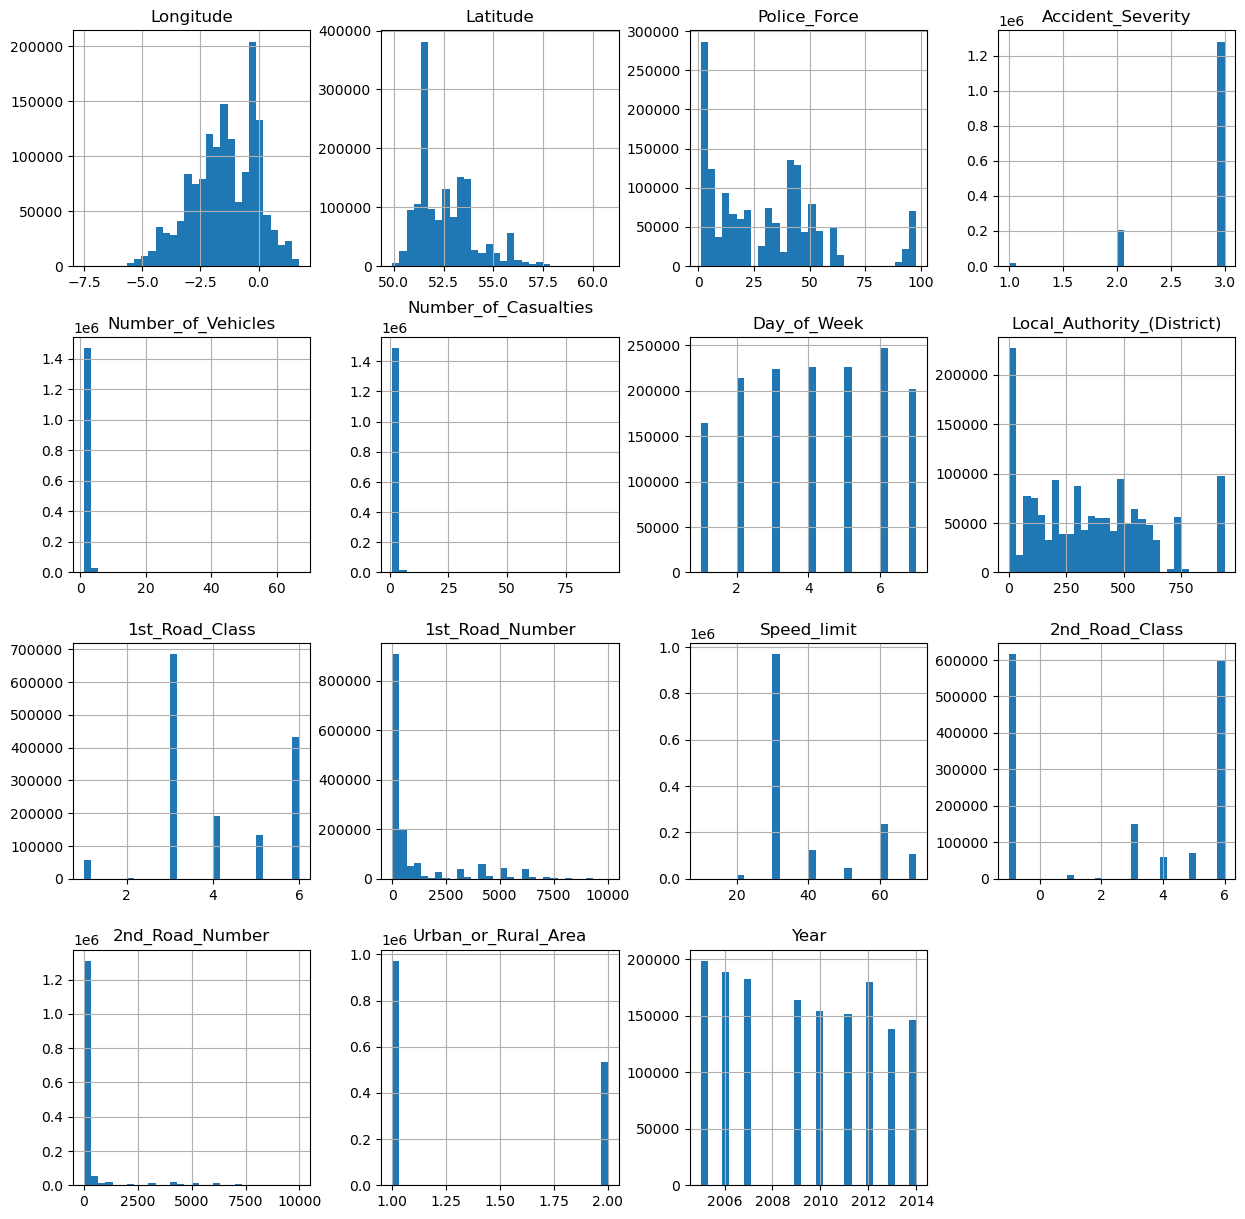

In [16]:
# Histogram Visualization for Numerical Data Range
dataset.hist(bins = 30, figsize = (15,15))

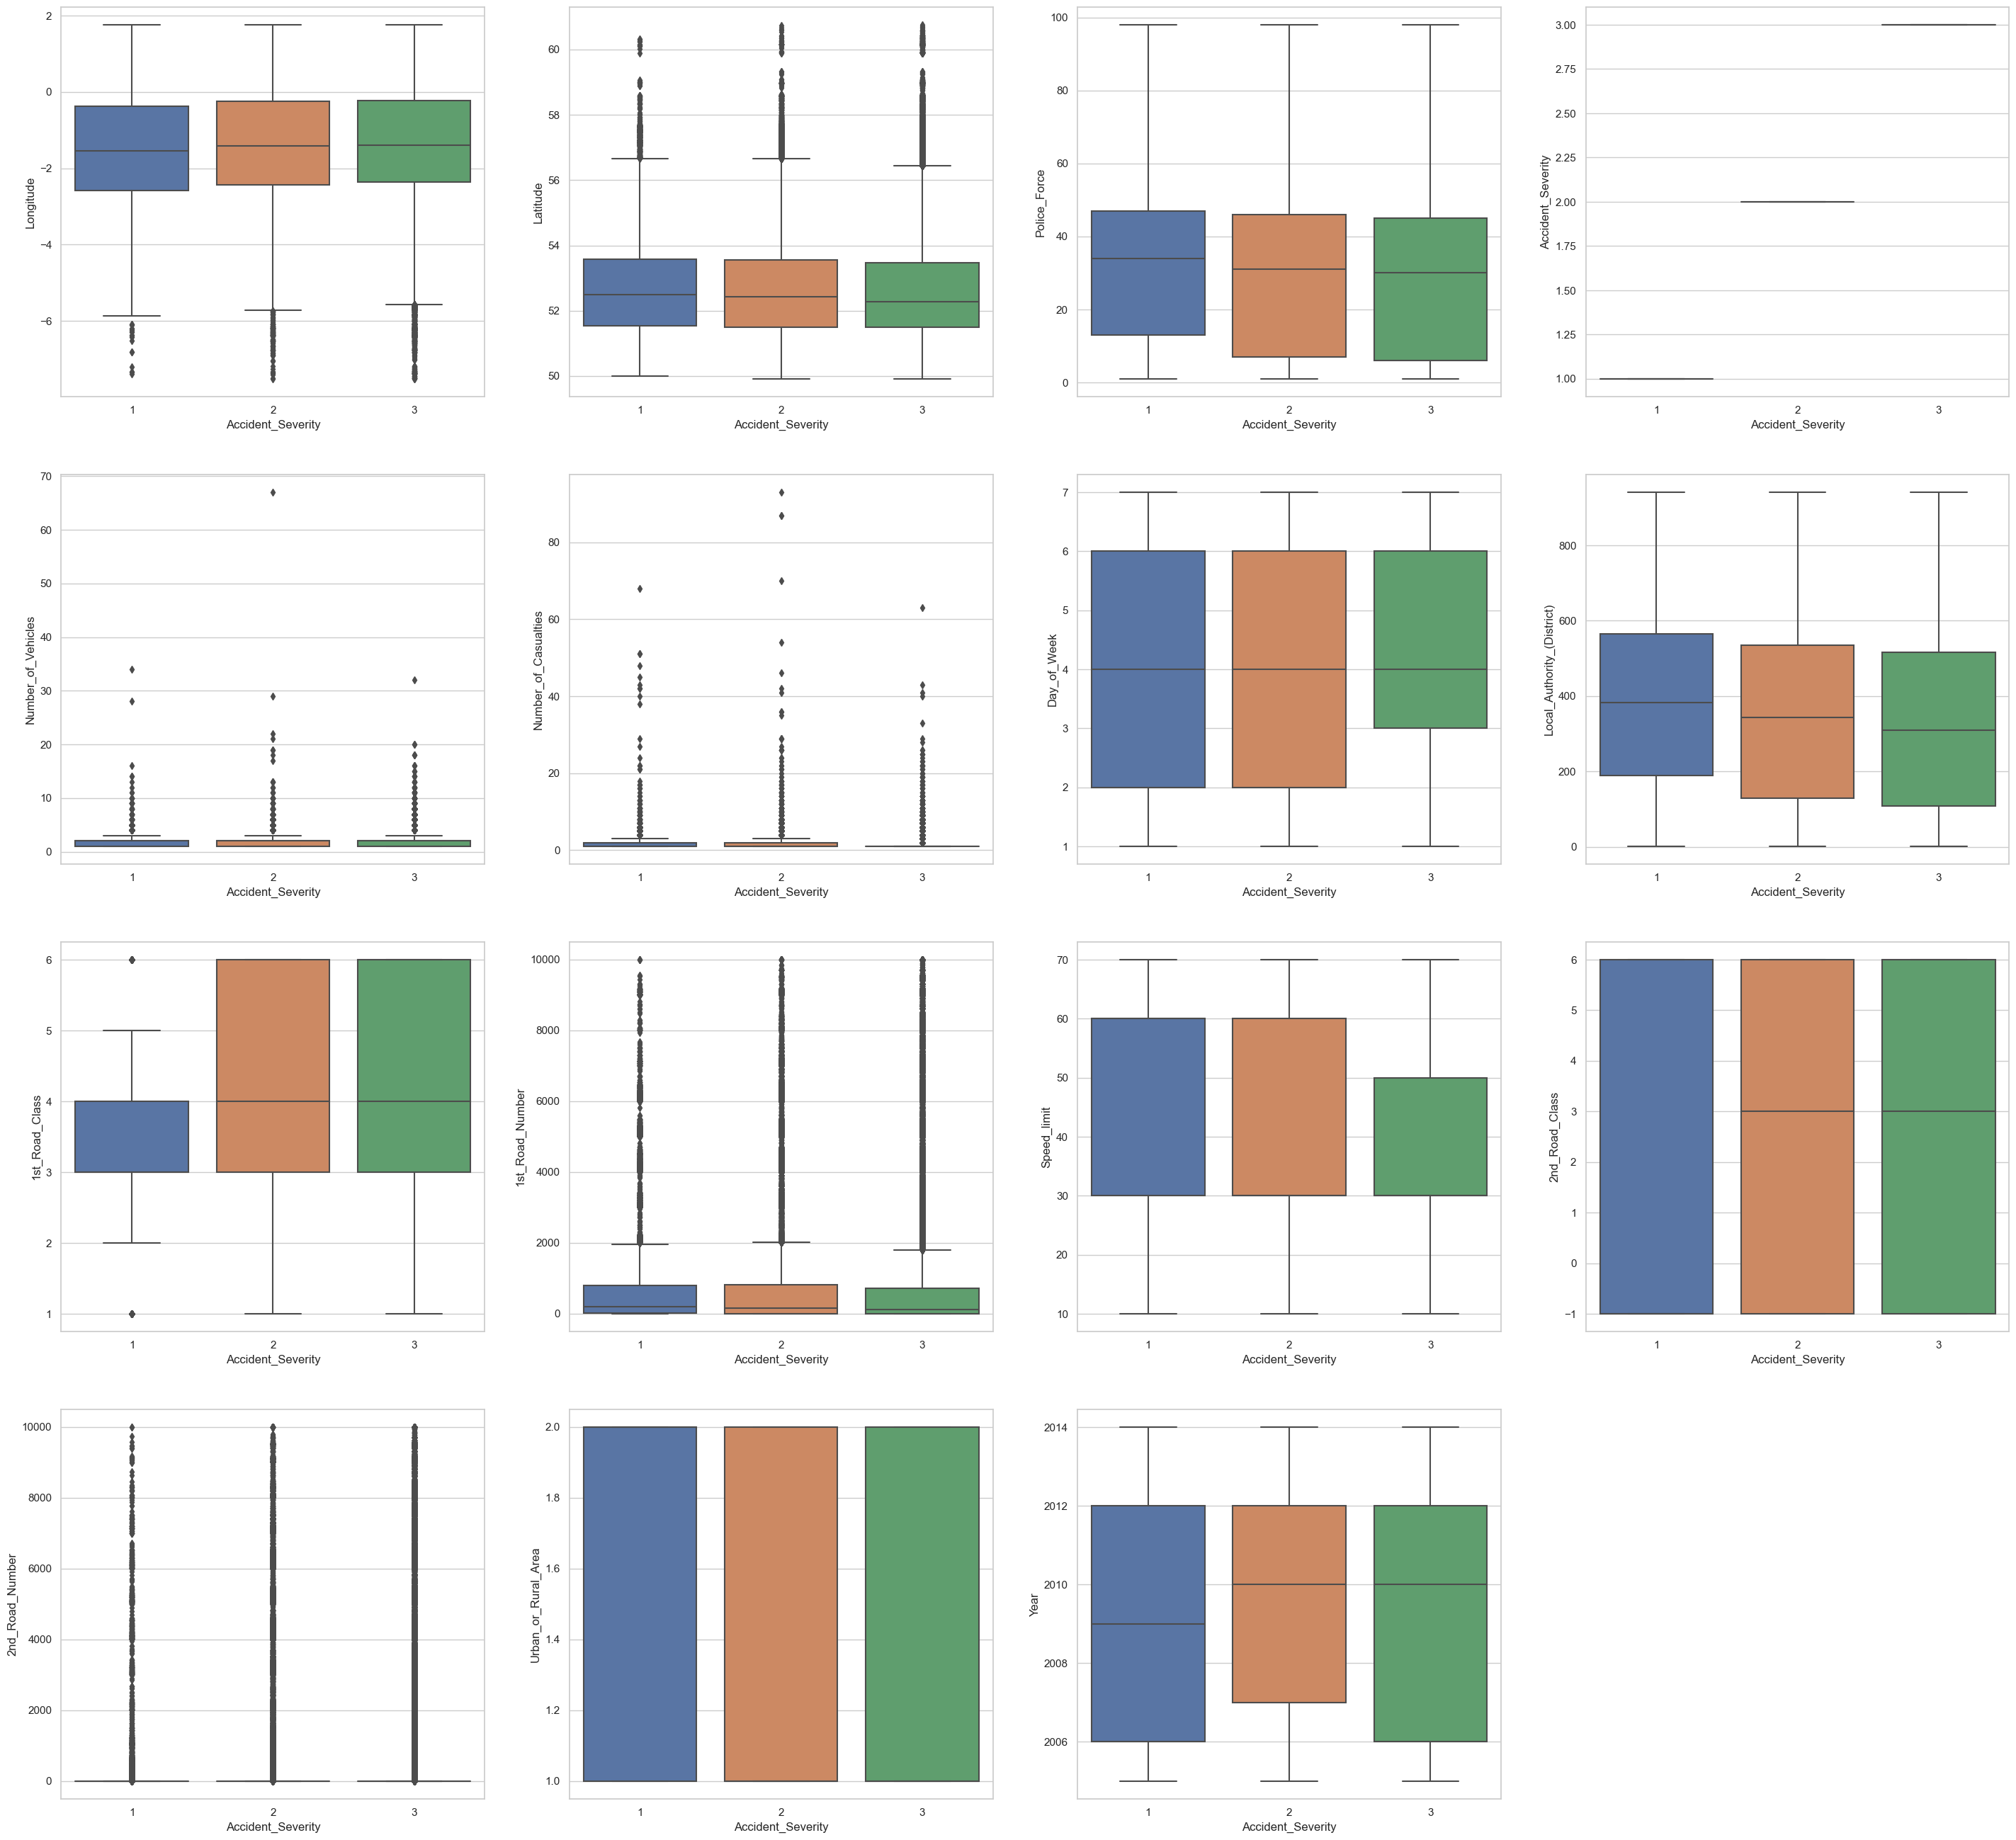

In [15]:
'''
Exploring Deviation and Outliers in data
'''
numerical_data = dataset.select_dtypes(include='number')
num_cols = numerical_data.columns

sns.set(style="whitegrid")
fig = plt.figure(figsize=(20, 50))
fig.subplots_adjust(right=1.5)

for plot in range(1, len(num_cols)+1):
    plt.subplot(6, 4, plot)
    sns.boxplot(x=dataset['Accident_Severity'],y=dataset[num_cols[plot-1]])

plt.show()

Outliers Analysis: from the box plots shown above there are some outliers in some of the columns compared to the Accident_severity, however, for the features that are significant to our model we dotn seem
to have nay crazy outliers. For example, number of vehicles and number of causalites are part of the outcome of the accident, therefore, they dont play a role in severity prediciton. Then, other colums with high ourliser like 1st and 2nd road number are just arbitraty numbers represting road numbers, therefore, varying numbers dont indicate anything. Finally, for longiture and latitude, outliers are expected. 

For all others, there aren't any crazy outliers as they are mostly discrete

In [16]:
# Correlation between variables
r_matrix = dataset.corr(method='spearman')
r_matrix['Accident_Severity'].sort_values()

Urban_or_Rural_Area          -0.073148
Speed_limit                  -0.067217
Number_of_Casualties         -0.053165
Local_Authority_(District)   -0.026914
Police_Force                 -0.026364
Latitude                     -0.025355
1st_Road_Number              -0.014135
Year                         -0.010539
Day_of_Week                   0.001858
1st_Road_Class                0.005808
Longitude                     0.012293
2nd_Road_Number               0.048089
2nd_Road_Class                0.053340
Number_of_Vehicles            0.107163
Accident_Severity             1.000000
Name: Accident_Severity, dtype: float64

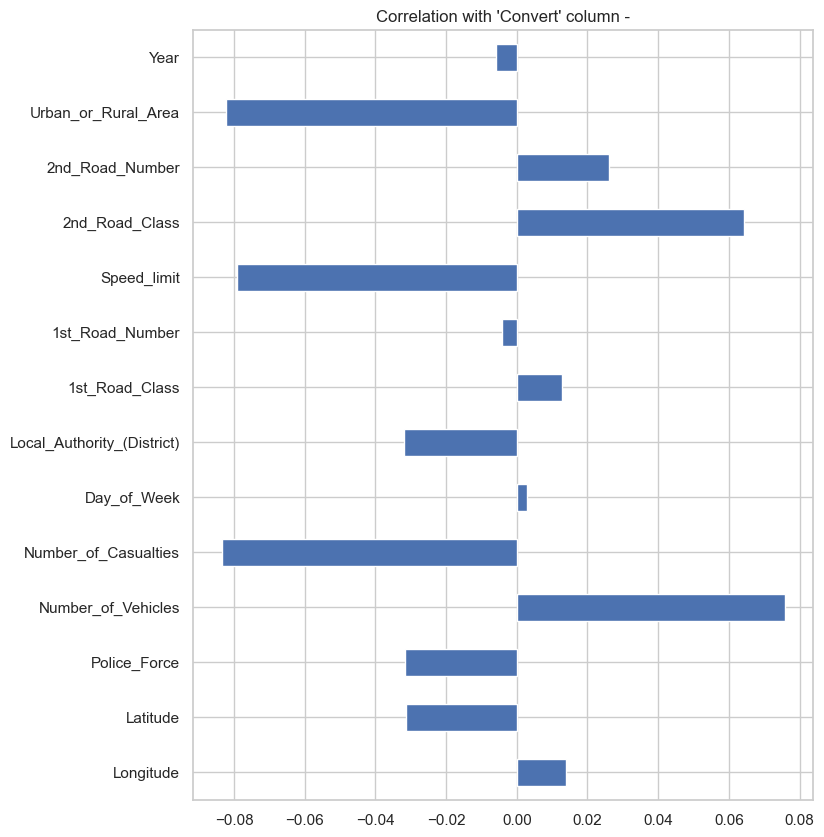

In [17]:
X = dataset.drop(columns=['Accident_Severity'], axis=1)

plt.figure(figsize=(8, 10))
X.corrwith(dataset['Accident_Severity']).plot(kind='barh', 
                               title="Correlation with 'Convert' column -")
plt.show()

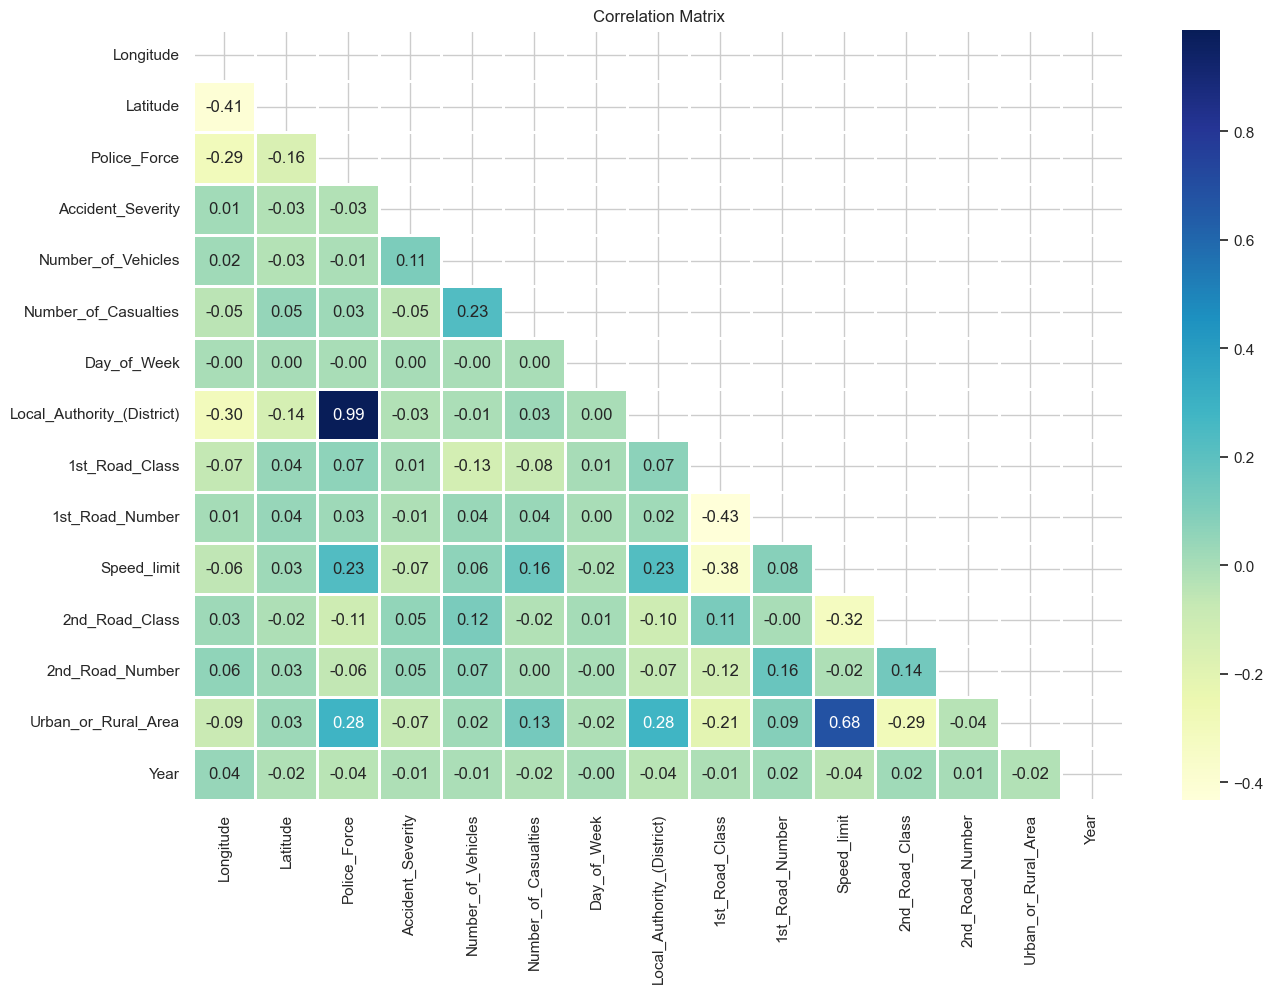

In [18]:
# Correlation Heat Map
plt.figure(figsize = (15,10))
mask = np.triu(np.ones_like(r_matrix, dtype=bool))
cormat = sns.heatmap(r_matrix, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

Correlation: I used spearman method because of some past reserch papers I explored. Now taking a look at the values:
- Strongest postive correlation was with the number of vehicles, however, as mentioned, this is an outcome as well just as accident severity so it isn't indicative
- Then the 2nd_road class was the next highest postive relationship.
- For the lowest negative realtionship we have urban or rural area, indicating that more accidents happen in urban areas
- Speed limit has intersting realtionships. For high speed limits we seem to have lower severity. 
- For the day of week, we have a low value. As higher num days dont indicate anything, we will have to explore this differentely

In [19]:
# Looking at day of week
dt3 = dataset.groupby('Day_of_Week')['Accident_Index'].count()\
.reset_index()\
.rename(columns={'Accident_Index':'No. of Accidents'})

fig = px.line(dt3, x='Day_of_Week', y='No. of Accidents',
              labels={'index': 'Day_of_Week', 'value': 'No. of Accidents'})
fig.show()

In [75]:
# group by Day_of_Week and Accident_Severity
dt = dataset.groupby(['Day_of_Week', 'Accident_Severity']).size().reset_index(name='Count')

# create the plot
fig = px.bar(dt, x='Day_of_Week', y='Count', color='Accident_Severity',
             labels={'Day_of_Week': 'Day of the Week', 'Count': 'Number of Accidents'})

# update the x-axis labels to be day names instead of numbers
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6, 7],
        ticktext=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    )
)

# show the plot
fig.show()

Based on the figures above, it looks like Saturday has the biggest number of accidents, however, there isn't an appreant corealltion with teh accident severity level

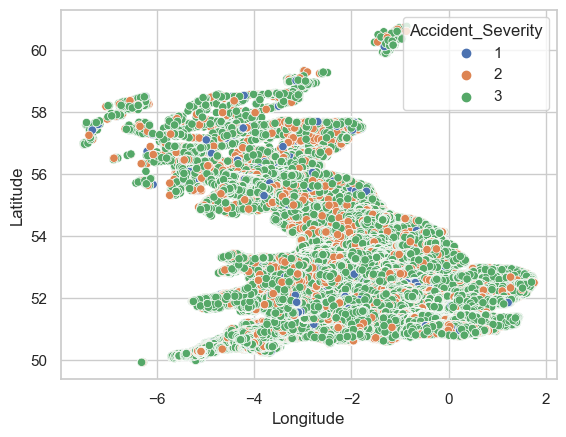

In [21]:
# create a scatter plot with different colors for each severity
sns.scatterplot(data=dataset, x='Longitude', y='Latitude', hue='Accident_Severity', palette='deep')
plt.show()

We can see a random pattern between the accident severity and the location (latitude and longitude)

#### Categorical Data

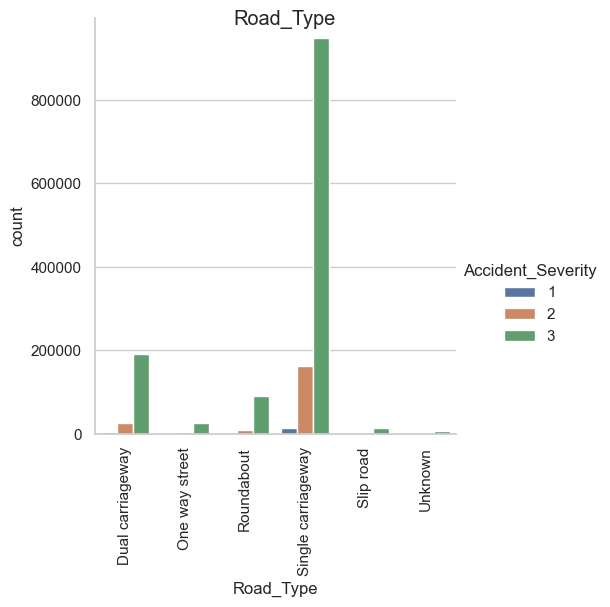

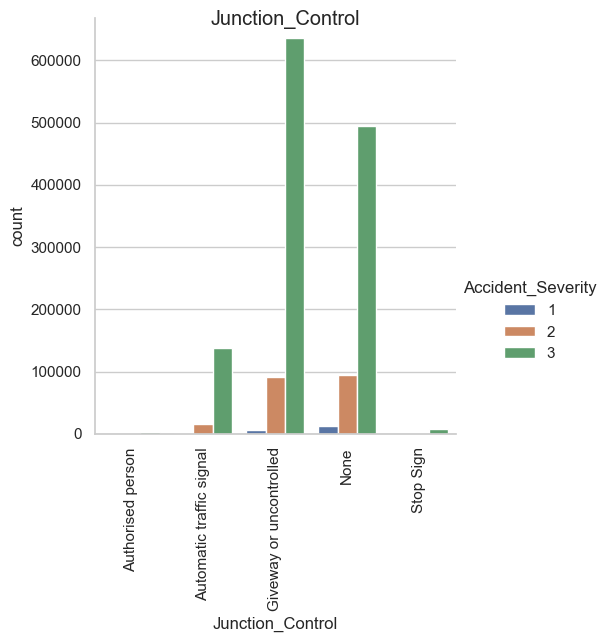

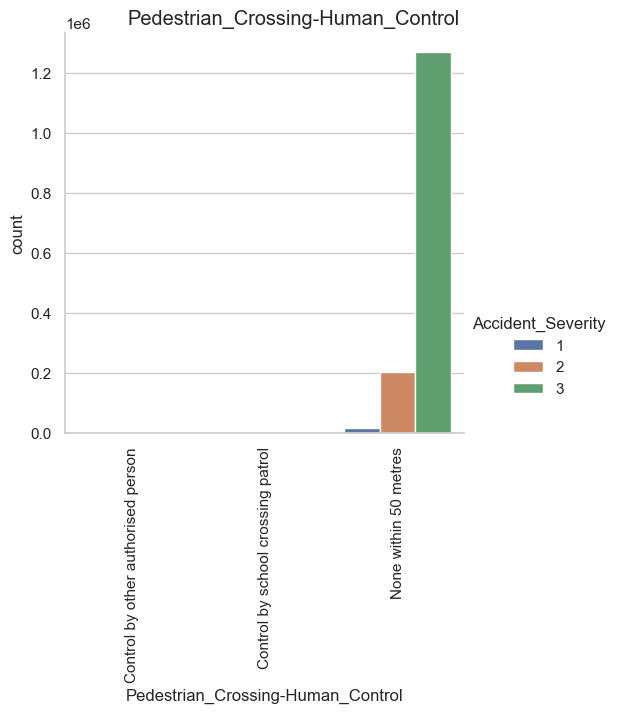

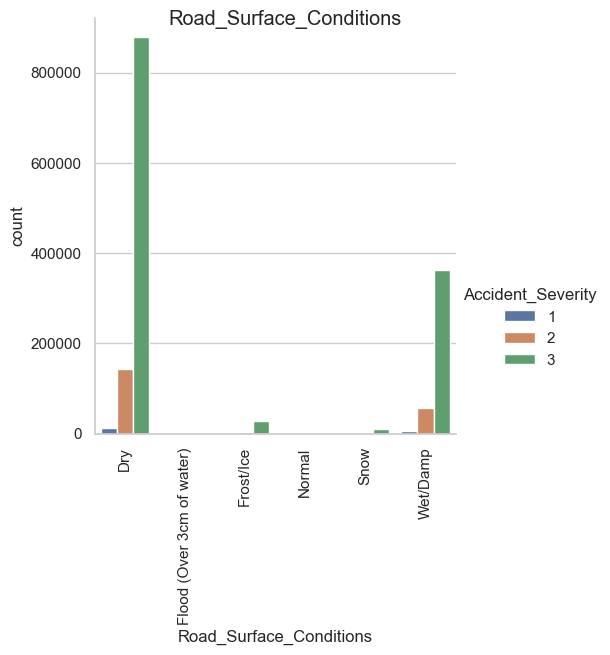

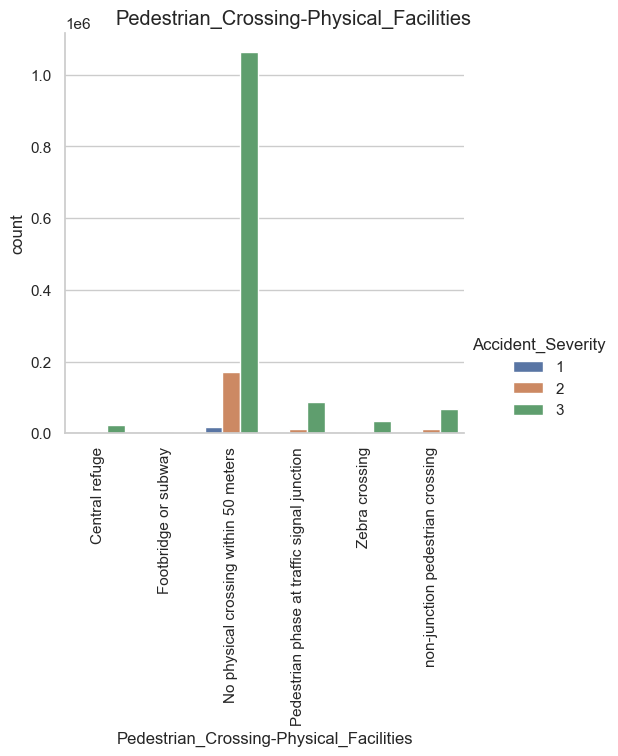

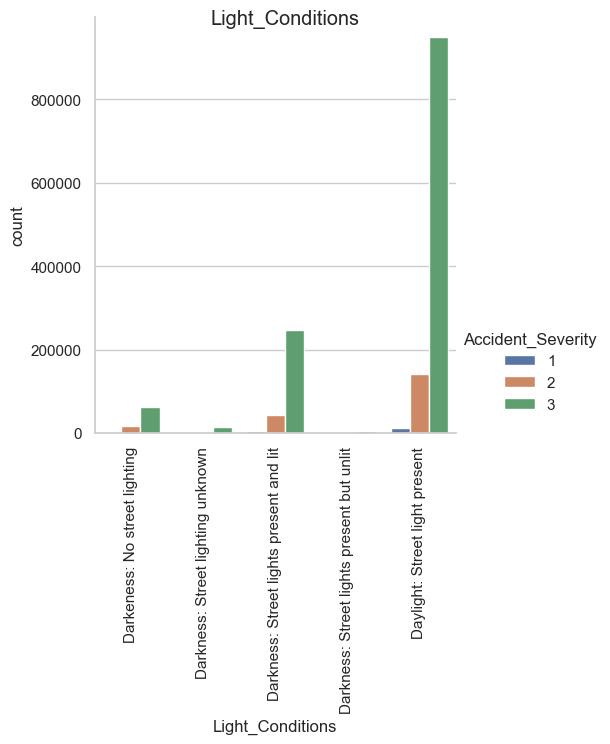

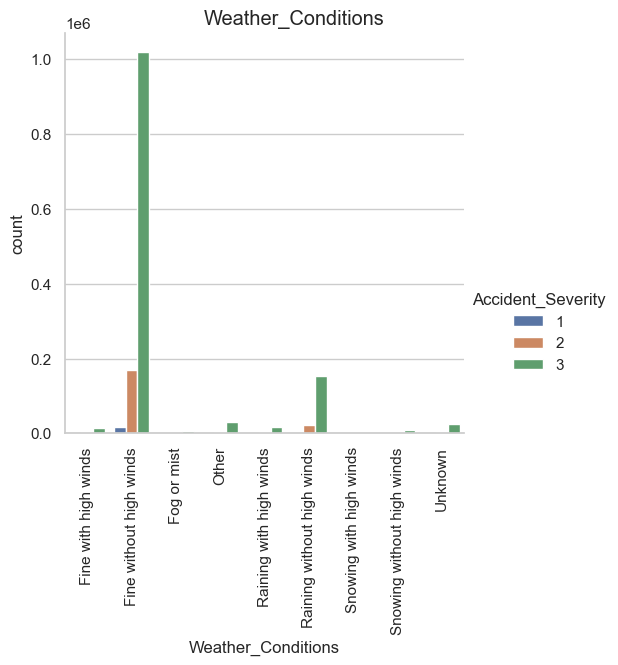

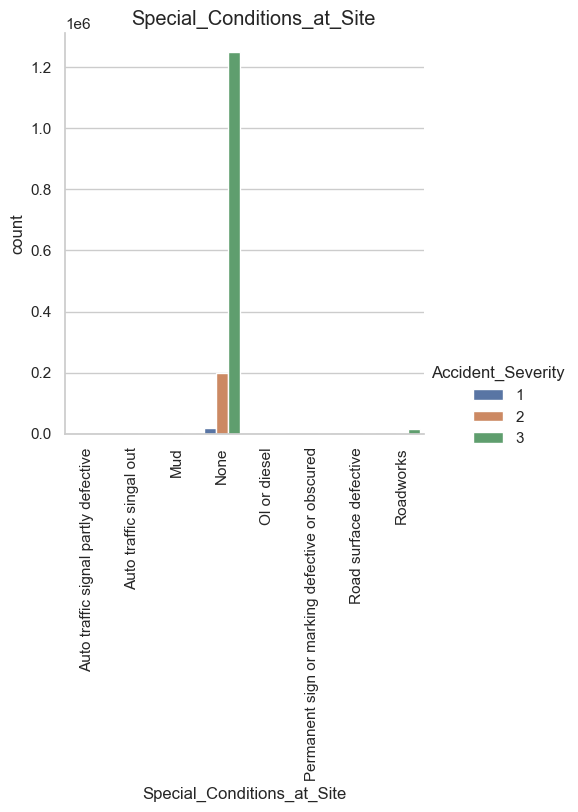

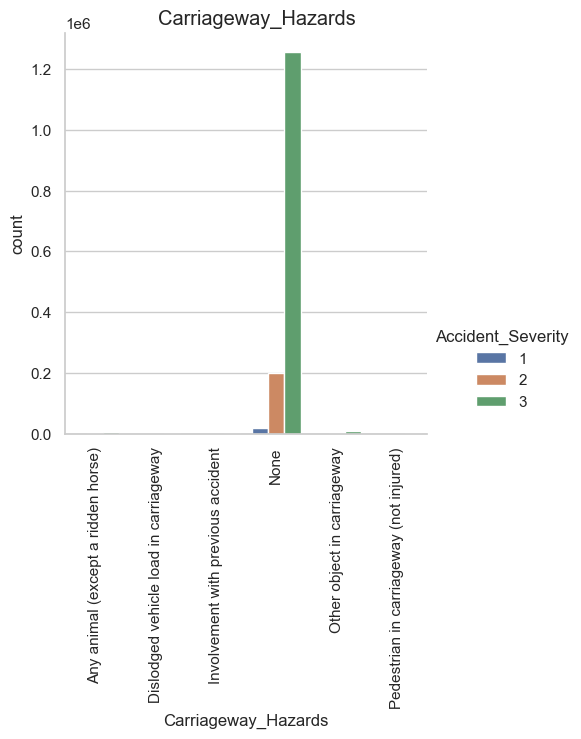

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of categorical variables
cat_cols = ['Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Road_Surface_Conditions',
            'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions',
            'Special_Conditions_at_Site', 'Carriageway_Hazards']

# Loop through each categorical variable and plot a bar chart for each accident severity level
for col in cat_cols:
    # Group the data by the categorical variable and accident severity level and count the frequency
    grouped_data = dataset.groupby(['Accident_Severity', col]).size().reset_index(name='count')
    # Plot the bar chart
    g = sns.catplot(x=col, y='count', hue='Accident_Severity', data=grouped_data, kind='bar')
    g.fig.suptitle(col)
    plt.xticks(rotation=90)
    plt.show()

Findings: Most accidents:
- if road was single carriageway.
- if junction was either uncontrolled junction or there wasn't any junction at all.
- when there were no human controlled pedestrian crossing within 50 metres of the spot.
- the weather was dry.
- there was no physical crossing within 50 metres of the spot.
- happened in daylight so the visibility was fine.
- the weather was fine without high winds.
- there wasn't any special condition or any problem with the carriageway.

#### Final Data Clean

Now that we have explored the data better, we can remove certain columns that won't play a role in our model. The following dropped columns are:
- 'Accident_Index': unessary
- 'Number_of_Vehicles' and 'Number_of_Casualties': as discussed before these are outcomes of accident and are not involved in the conditions to affect severity of accident
- '1st_Road_Number' and '2nd_Road_Number': Unecessary as mentioned earlier
- 'Did_Police_Officer_Attend_Scene_of_Accident': after accident as well
- 'Longitude' and 'Latitude': random and not indicative
- 'Date' and 'year': features that just provide historical trends but not necessarily affect our data

In [17]:
#Dropping
dataset.drop(['Accident_Index','Number_of_Vehicles','Number_of_Casualties','1st_Road_Number','2nd_Road_Number','Did_Police_Officer_Attend_Scene_of_Accident','Longitude','Latitude','Date','Year'],axis=1,inplace=True)

In [18]:
dataset.head()

,Police_Force,Accident_Severity,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
0,1,2,3,17:42,12,3,Single carriageway,30,None,-1,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1
1,1,3,4,17:36,12,4,Dual carriageway,30,Automatic traffic signal,5,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1
2,1,3,5,00:15,12,5,Single carriageway,30,None,-1,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1
3,1,3,6,10:35,12,3,Single carriageway,30,None,-1,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1
4,1,3,2,21:13,12,6,Single carriageway,30,None,-1,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1


In [19]:
#Fixing the time object and breaking into Morning, Afternoon and Night
times = dataset['Time']
times_final = []

for time in times:
    hr = int(time.split(':')[0])
    if hr > 8 and hr < 12:
        times_final.append('Morning')
    elif hr > 12 and hr < 20:
        times_final.append('Afternoon')
    else:
        times_final.append('Night')

dataset['Time'] = times_final

In [20]:
dataset.head()

,Police_Force,Accident_Severity,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
0,1,2,3,Afternoon,12,3,Single carriageway,30,None,-1,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1
1,1,3,4,Afternoon,12,4,Dual carriageway,30,Automatic traffic signal,5,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1
2,1,3,5,Night,12,5,Single carriageway,30,None,-1,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1
3,1,3,6,Morning,12,3,Single carriageway,30,None,-1,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1
4,1,3,2,Night,12,6,Single carriageway,30,None,-1,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1


#### Label Enconding

In [21]:
categorical_data = dataset.select_dtypes(include='object')
cat_cols = categorical_data.columns
print(cat_cols)

Index(['Time', 'Road_Type', 'Junction_Control',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards'],
      dtype='object')


In [22]:
# Loop to One Hot Encode all Categorical Columns

for column in cat_cols:
    # Instantiate One Hot Encoder Object
    encoder = OneHotEncoder()

    # New encoded array
    encoded_data = encoder.fit_transform(dataset.loc[:,[column]]).toarray()
    #Get the column names
    column_names = encoder.get_feature_names_out([column])
    # Convert the encoded data array into a DataFrame
    clean_encoded = pd.DataFrame(encoded_data, columns=column_names)

    # Drop and Add new columns
    dataset = dataset.drop(column, axis=1)
    dataset = pd.concat([dataset, clean_encoded], axis=1)

In [23]:
dataset.head()

,Police_Force,Accident_Severity,Day_of_Week,Local_Authority_(District),1st_Road_Class,Speed_limit,2nd_Road_Class,Urban_or_Rural_Area,Time_Afternoon,Time_Morning,Time_Night,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,Road_Type_nan,Junction_Control_Authorised person,Junction_Control_Automatic traffic signal,Junction_Control_Giveway or uncontrolled,Junction_Control_None,Junction_Control_Stop Sign,Junction_Control_nan,Pedestrian_Crossing-Human_Control_Control by other authorised person,Pedestrian_Crossing-Human_Control_Control by school crossing patrol,Pedestrian_Crossing-Human_Control_None within 50 metres,Pedestrian_Crossing-Human_Control_nan,Pedestrian_Crossing-Physical_Facilities_Central refuge,Pedestrian_Crossing-Physical_Facilities_Footbridge or subway,Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters,Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction,Pedestrian_Crossing-Physical_Facilities_Zebra crossing,Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing,Pedestrian_Crossing-Physical_Facilities_nan,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Light_Conditions_nan,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Weather_Conditions_nan,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Normal,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Road_Surface_Conditions_nan,Special_Conditions_at_Site_Auto traffic signal partly defective,Special_Conditions_at_Site_Auto traffic singal out,Special_Conditions_at_Site_Mud,Special_Conditions_at_Site_None,Special_Conditions_at_Site_Ol or diesel,Special_Conditions_at_Site_Permanent sign or marking defective or obscured,Special_Conditions_at_Site_Road surface defective,Special_Conditions_at_Site_Roadworks,Special_Conditions_at_Site_nan,Carriageway_Hazards_Any animal (except a ridden horse),Carriageway_Hazards_Dislodged vehicle load in carriageway,Carriageway_Hazards_Involvement with previous accident,Carriageway_Hazards_None,Carriageway_Hazards_Other object in carriageway,Carriageway_Hazards_Pedestrian in carriageway (not injured),Carriageway_Hazards_nan
0,1.0,2.0,3.0,12.0,3.0,30.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,3.0,4.0,12.0,4.0,30.0,5.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,3.0,5.0,12.0,5.0,30.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,3.0,6.0,12.0,3.0,30.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [24]:
dataset.columns

Index(['Police_Force', 'Accident_Severity', 'Day_of_Week',
       'Local_Authority_(District)', '1st_Road_Class', 'Speed_limit',
       '2nd_Road_Class', 'Urban_or_Rural_Area', 'Time_Afternoon',
       'Time_Morning', 'Time_Night', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown', 'Road_Type_nan',
       'Junction_Control_Authorised person',
       'Junction_Control_Automatic traffic signal',
       'Junction_Control_Giveway or uncontrolled', 'Junction_Control_None',
       'Junction_Control_Stop Sign', 'Junction_Control_nan',
       'Pedestrian_Crossing-Human_Control_Control by other authorised person',
       'Pedestrian_Crossing-Human_Control_Control by school crossing patrol',
       'Pedestrian_Crossing-Human_Control_None within 50 metres',
       'Pedestrian_Crossing-Human_Control_nan',
       'Pedestrian_Crossing-Physical_Facilities_Central refuge',
  

In [25]:
dataset.isnull().sum()

Police_Force                                                                           260
Accident_Severity                                                                      260
Day_of_Week                                                                            260
Local_Authority_(District)                                                             260
1st_Road_Class                                                                         260
Speed_limit                                                                            260
2nd_Road_Class                                                                         260
Urban_or_Rural_Area                                                                    260
Time_Afternoon                                                                         260
Time_Morning                                                                           260
Time_Night                                                                             260

In [26]:
'''
For now drop NaN but come back later to understand the problem
'''
dataset = dataset.dropna()

In [27]:
dataset.isnull().sum()

Police_Force                                                                           0
Accident_Severity                                                                      0
Day_of_Week                                                                            0
Local_Authority_(District)                                                             0
1st_Road_Class                                                                         0
Speed_limit                                                                            0
2nd_Road_Class                                                                         0
Urban_or_Rural_Area                                                                    0
Time_Afternoon                                                                         0
Time_Morning                                                                           0
Time_Night                                                                             0
Road_Type_Dual carria

In [34]:
dataset.shape

(1503630, 74)

## Models

In [99]:
#Model Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

#### Separating into Input and Output

In [28]:
X = dataset.iloc[:, :]
X = X.drop(columns=['Accident_Severity']).values
y = dataset.loc[:,['Accident_Severity']].values

#### Splitting Test and Training

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Logistic Regression

In [92]:
#build model
linear_model = LogisticRegression()
linear_model.fit(X_train, y_train)

#predict
y_pred_linear = linear_model.predict(X_test)


#### Ridge

In [88]:
#build model
ridge_model = RidgeClassifier(alpha=0.5) 
ridge_model.fit(X_train, y_train.ravel())

#predict
y_pred_ridge = ridge_model.predict(X_test)


#### Decision Tree

In [89]:
#build model
tree_model = DecisionTreeClassifier(random_state=0) 
tree_model.fit(X_train, y_train)

#predict
y_pred_tree = tree_model.predict(X_test)


#### Random Forest

In [105]:
'''
y is a column vector instead of a 1D array, which is what the random forest classifier expects therfore we use ravel() method to convert the column vector into a 1D array.
'''

#Build Model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train.ravel())

#Predict
y_pred_random_forest = random_forest.predict(X_test)

#calcualte accuracy
accuracy_forest = r2_score(y_test, y_pred_random_forest)

#### Evaluating

In [106]:
# Accuracy
print(f'Logistic Classifier {accuracy_score(y_test, y_pred_linear)}')
print(f'Ridge Classifier {accuracy_score(y_test, y_pred_ridge)}')
print(f'Tree Classifier {accuracy_score(y_test, y_pred_tree)}')
print(f'Random Forest Classifier {accuracy_score(y_test, y_pred_random_forest)}')

Logistic Classifier 0.8509606751660981
Ridge Classifier 0.8509606751660981
Tree Classifier 0.7415953392789449
Random Forest Classifier 0.8246676376502198


In [112]:
#Precision
precision_log = precision_score(y_test, y_pred_linear, average='weighted')
precision_ridge = precision_score(y_test, y_pred_ridge, average='weighted')
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
precision_forest = precision_score(y_test, y_pred_random_forest, average='weighted')

print(f'Logistic Classifier {precision_log}')
print(f'Ridge Classifier {precision_ridge}')
print(f'Tree Classifier {precision_tree}')
print(f'Random Forest Classifier {precision_forest}')

Logistic Classifier 0.7241340706791414
Ridge Classifier 0.7241340706791414
Tree Classifier 0.7559452395495323
Random Forest Classifier 0.7608434351282853


In [114]:
#Recall
recall_log = recall_score(y_test, y_pred_linear, average='weighted')
recall_ridge = recall_score(y_test, y_pred_ridge, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
recall_forest = recall_score(y_test, y_pred_random_forest, average='weighted')

print(f'Logistic Classifier {recall_log}')
print(f'Ridge Classifier {recall_ridge}')
print(f'Tree Classifier {recall_tree}')
print(f'Random Forest Classifier {recall_forest}')

Logistic Classifier 0.8509606751660981
Ridge Classifier 0.8509606751660981
Tree Classifier 0.7415953392789449
Random Forest Classifier 0.8246676376502198


In [115]:
#f1 Score
f1_score_log = f1_score(y_test, y_pred_linear, average='weighted')
f1_score_ridge = f1_score(y_test, y_pred_ridge, average='weighted')
f1_score_tree = f1_score(y_test, y_pred_tree, average='weighted')
f1_score_forest = f1_score(y_test, y_pred_random_forest, average='weighted')

print(f'Logistic Classifier {f1_score_log}')
print(f'Ridge Classifier {f1_score_ridge}')
print(f'Tree Classifier {f1_score_tree}')
print(f'Random Forest Classifier {f1_score_forest}')

Logistic Classifier 0.7824413348102713
Ridge Classifier 0.7824413348102713
Tree Classifier 0.7485712216850692
Random Forest Classifier 0.7850110198201202


#### Optimizing Logistic Regression

In [82]:
# Define the parameter grid to search over
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression model
logreg = LogisticRegression(random_state=0)

# Use grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and their associated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters:  {'C': 0.001, 'penalty': 'l2'}
Best cross-validation score: 0.85


In [110]:
# Train with this parameters and get the accuracy

# create logistic regression object
logreg = LogisticRegression(C=0.001, penalty='l2', random_state=0)

# fit the model on the training data
logreg.fit(X_train, y_train)

# predict on the test data
y_pred_logistic_2 = logreg.predict(X_test)

#metrics
precision_log2 = precision_score(y_test, y_pred_logistic_2, average='weighted')
recall_log2 = recall_score(y_test, y_pred_logistic_2, average='weighted')
f1_score_log2 = f1_score(y_test, y_pred_logistic_2, average='weighted')

print(f'Logistic Regression Accuracy {accuracy_score(y_test, y_pred_logistic_2)}')
print(f'Logistic Regression Precision {precision_log2}')
print(f'Logistic Regression Recall {recall_log2}')
print(f'Logistic Regression F1 {f1_score_log2}')

Logistic Regression Accuracy 0.8509606751660981
Logistic Regression Precision 0.7241340706791414
Logistic Regression Recall 0.8509606751660981
Logistic Regression F1 0.7824413348102713


#### ANN

In [40]:
#Importing Libraries
import tensorflow as tf
from keras.utils import to_categorical

In [37]:
def count_unique_values(arr):
    unique, counts = np.unique(arr, return_counts=True)
    for val, count in zip(unique, counts):
        print(f"{val}: {count}")
        print(type(val))

count_unique_values(y_train)

1.0: 15562
<class 'numpy.float64'>
2.0: 163455
<class 'numpy.float64'>
3.0: 1023887
<class 'numpy.float64'>


In [58]:
y_train_int = np.array(y_train, dtype='int') - 1  # Subtract 1 to make the range 0 to 2
y_test_int = np.array(y_test, dtype='int') - 1

In [61]:
y_train_cat = to_categorical(y_train_int, num_classes=3)
y_test_cat = to_categorical(y_test_int, num_classes=3)

In [52]:
y_train_cat

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [72]:
#Model Architecture

# Intializing ANN Models
ANN = tf.keras.models.Sequential()
# Adding Input Layers
ANN.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim =73))
# Adding Hidden Layers
ANN.add(tf.keras.layers.Dense(units=32, activation='relu'))
# Output Layer
ANN.add(tf.keras.layers.Dense(units=3, activation='sigmoid'))


In [73]:
#
ANN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [74]:
ANN.fit(X_train, y_train_cat, batch_size = 32, epochs = 1)

37591/37591 [==============================] - 43s 1ms/step - loss: 0.4740 - accuracy: 0.8500


In [56]:
y_pred_1 = ANN.predict(X_test)

9398/9398 [==============================] - 7s 711us/step


In [68]:
y_test_cat

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [67]:
y_pred_1

array([[0.06293713, 0.66726637, 0.9423653 ],
       [0.11783464, 0.6705856 , 0.94256866],
       [0.05747977, 0.46037495, 0.8304999 ],
       ...,
       [0.09122328, 0.6140875 , 0.9201121 ],
       [0.06933854, 0.318394  , 0.67364156],
       [0.0823117 , 0.63509876, 0.9293792 ]], dtype=float32)

In [81]:
y_pred_labels = to_categorical((np.argmax(y_pred_1, axis=1)),num_classes=3)

In [82]:
y_pred_labels

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [119]:
#Acccuracy
accuarcy_ann1 = accuracy_score(y_test_cat, y_pred_labels)
precision_ann = precision_score(y_test_cat, y_pred_labels, average='weighted')
recall_ann = recall_score(y_test_cat, y_pred_labels, average='weighted')
f1_score_ann = f1_score(y_test_cat, y_pred_labels, average='weighted')

print(f'ANN 1 Accuracy: {accuarcy_ann1}')
print(f'ANN 1 Precision: {precision_ann}')
print(f'ANN 1 Recall: {recall_ann}')
print(f'ANN 1 F1: {f1_score_ann}')

ANN 1 Accuracy: 0.8509606751660981
ANN 1 Precision: 0.7241340706791414
ANN 1 Recall: 0.8509606751660981
ANN 1 F1: 0.7824413348102713
